In [1]:
import sys
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install imblearn

In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
c = pd.read_excel('polyp_data v2.xlsx')
print(c)

      sex  location  nutrition  reason  past_diagnosis  diagnosis  polyp_loca  \
0       1         3          2       1               4          1           1   
1       1         3          2       1               4          1           1   
2       1         2          2       1               4          3           2   
3       2         1          2       1               4          3           2   
4       1         2          2       1               4          1           1   
...   ...       ...        ...     ...             ...        ...         ...   
2664    1         1          2       1               4          1           1   
2665    1         1          2       1               2          2           2   
2666    2         2          2       1               4          3           3   
2667    1         1          2       1               4          1           1   
2668    1         2          2       1               4          2           2   

      polyp_size  polyp_num

In [4]:
d = c.iloc[:, 0:14]
d.columns = d.columns.str.strip()
print(d)

      sex  location  nutrition  reason  past_diagnosis  diagnosis  polyp_loca  \
0       1         3          2       1               4          1           1   
1       1         3          2       1               4          1           1   
2       1         2          2       1               4          3           2   
3       2         1          2       1               4          3           2   
4       1         2          2       1               4          1           1   
...   ...       ...        ...     ...             ...        ...         ...   
2664    1         1          2       1               4          1           1   
2665    1         1          2       1               2          2           2   
2666    2         2          2       1               4          3           3   
2667    1         1          2       1               4          1           1   
2668    1         2          2       1               4          2           2   

      polyp_size  polyp_num

<AxesSubplot:>

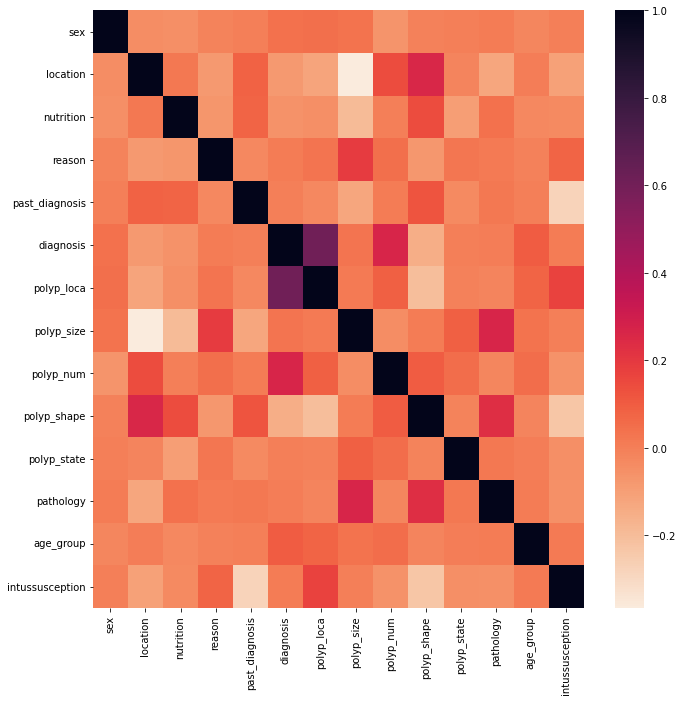

In [5]:
# sns.axes_style("white")
ax = plt.subplots(figsize=(11,11))

corr = d.corr()

#sns.heatmap(corr, vmin=-1, vmax=1, cmap=sns.cm.rocket_r)
sns.heatmap(corr, cmap=sns.cm.rocket_r)

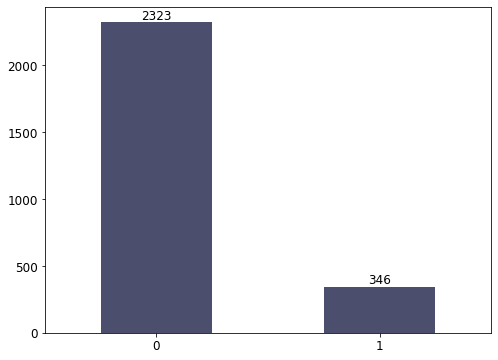

In [6]:
vals = d.intussusception.value_counts()

plt.figure(figsize=(8,6))
plt.rc('font', size=12)

ax = vals.plot.bar(rot=0, color='#4B4E6D')

for i in range(len(vals)):
    ax.annotate(vals[i], xy=[vals.index[i], vals[i]], ha='center', va='bottom')

In [7]:
X = d.loc[:, d.columns != 'intussusception']
y = d.intussusception
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (2669, 13)
y shape: (2669,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

def confusion(y_test, y_pred):
    conf = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['True[0]', 'True[1]'], columns=['Predict[0]', 'Predict[1]'])
    print('Confusion Matrix:')
    print(conf)
    return conf

confusion(y_test, y_pred) 

Accuracy: 92.13%
Confusion Matrix:
         Predict[0]  Predict[1]
True[0]         455           7
True[1]          35          37


,Predict[0],Predict[1]
True[0],455,7
True[1],35,37


In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
X_test_sm, y_test_sm = smote.fit_resample(X_test, y_test)

X_train_sm = pd.DataFrame(X_train_sm, columns=X.columns)
X_test_sm = pd.DataFrame(X_test_sm, columns=X.columns)

print(y_train_sm.value_counts())
print(y_test_sm.value_counts())

0    1861
1    1861
Name: intussusception, dtype: int64
0    462
1    462
Name: intussusception, dtype: int64


In [11]:
# After oversampling, the classification result is more reasonable.
model = XGBClassifier()
model.fit(X_train_sm, y_train_sm)
y_pred_sm = model.predict(X_test_sm)

accuracy = accuracy_score(y_test_sm, y_pred_sm)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
conf = pd.DataFrame(confusion_matrix(y_test_sm, y_pred_sm), index=['True[0]', 'True[1]'], columns=['Predict[0]', 'Predict[1]'])
conf

Accuracy: 82.36%


,Predict[0],Predict[1]
True[0],405,57
True[1],106,356


In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
#X_test_sm, y_test_sm = smote.fit_sample(X_test, y_test)

X_train_sm = pd.DataFrame(X_train_sm, columns=X.columns)
#X_test_sm = pd.DataFrame(X_test_sm, columns=X.columns)

In [14]:
print('X train shape: ',X_train_sm.shape)
print('y train values: \n', y_train_sm.value_counts())
print()
print('X test shape: ',X_test_sm.shape)
print('y test values: \n', y_test_sm.value_counts())

X train shape:  (3722, 13)
y train values: 
 0    1861
1    1861
Name: intussusception, dtype: int64

X test shape:  (924, 13)
y test values: 
 0    462
1    462
Name: intussusception, dtype: int64


In [15]:
mscore=[]

In [16]:
from sklearn.linear_model import LogisticRegression
from time import process_time

clf = LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=12)

start = process_time()
clf.fit(X_train_sm, y_train_sm)
end = process_time()
print(end - start)

clf_prediction_proba = clf.predict_proba(X_test)[:, 1]

y_pred = clf.predict(X_test)

print('Accuracy Score:', clf.score(X_test, y_test))
print('Prediction:', y_pred)

mscore.append(['Logistic Regression', clf.score(X_test, y_test)])

print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)

0.21924900000000136
Accuracy Score: 0.7359550561797753
Prediction: [0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1
 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 

/Users/zhiyi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Predict[0],Predict[1]
True[0],349,113
True[1],28,44


In [17]:
from sklearn.ensemble import RandomForestClassifier
from time import process_time

rnd_clf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=12)

start = process_time()
model = rnd_clf.fit(X_train_sm, y_train_sm)
end = process_time()
print(end - start)

rf_prediction_proba = rnd_clf.predict_proba(X_test)[:, 1]

y_pred = rnd_clf.predict(X_test)

print('Accuracy Score:', rnd_clf.score(X_test, y_test))
print('Prediction:', y_pred)

mscore.append(['Random Forest', rnd_clf.score(X_test, y_test)])

print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)
print(pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False))

0.5659159999999996
Accuracy Score: 0.8520599250936329
Prediction: [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1
 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from time import process_time

bagging = BaggingClassifier(base_estimator= DecisionTreeClassifier(random_state=12), max_samples = 1.0, max_features = 1.0, 
                            bootstrap = True, bootstrap_features = False, random_state=12)

start = process_time()
bagging.fit(X_train_sm, y_train_sm)
end = process_time()
print(end - start)

bg_prediction_proba = bagging.predict_proba(X_test)[:, 1]

y_pred = bagging.predict(X_test)

print('Accuracy Score:', bagging.score(X_test, y_test))
print('Prediction:', y_pred)

mscore.append(['Bagging DecisionTree', bagging.score(X_test, y_test)])

print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)

0.0855080000000008
Accuracy Score: 0.8389513108614233
Prediction: [0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0

,Predict[0],Predict[1]
True[0],402,60
True[1],26,46


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from time import process_time

knn = KNeighborsClassifier()

start = process_time()
knn.fit(X_train_sm, y_train_sm)
end = process_time()
print(end - start)

knn_prediction_proba = knn.predict_proba(X_test)[:, 1]

y_pred = knn.predict(X_test)

print('Accuracy Score:', knn.score(X_test, y_test))
print('Prediction:', y_pred)

mscore.append(['KNN', knn.score(X_test, y_test)])

print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)

0.011257000000000517
Accuracy Score: 0.8932584269662921
Prediction: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0

,Predict[0],Predict[1]
True[0],445,17
True[1],40,32


In [20]:
from sklearn.naive_bayes import GaussianNB
from time import process_time

gnb = GaussianNB()

start = process_time()
gnb.fit(X_train_sm, y_train_sm)
end = process_time()
print(end - start)

gnb_prediction_proba = gnb.predict_proba(X_test)[:, 1]

y_pred = gnb.predict(X_test)

print('Accuracy Score:', gnb.score(X_test, y_test))
print('Prediction:', y_pred)

mscore.append(['Gaussian Naive Bayes', gnb.score(X_test, y_test)])

print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)

0.007601000000001079
Accuracy Score: 0.5187265917602997
Prediction: [1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0
 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0
 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1
 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1
 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0
 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1
 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1
 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1
 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0
 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0

,Predict[0],Predict[1]
True[0],209,253
True[1],4,68


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from time import process_time

gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, random_state=12)

start = process_time()
model = gbc.fit(X_train_sm, y_train_sm)
end = process_time()
print(end - start)

gbc_prediction_proba = gbc.predict_proba(X_test)[:, 1]

y_pred = gbc.predict(X_test)

print('Accuracy Score:', gbc.score(X_test, y_test))
print('Prediction:', y_pred)

mscore.append(['Gradient Boosting', gbc.score(X_test, y_test)])

print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)
print(pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False))

0.3909699999999994
Accuracy Score: 0.8127340823970037
Prediction: [0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1
 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1
 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from time import process_time

ada = AdaBoostClassifier(learning_rate=1.0, n_estimators=50, random_state=12)

start = process_time()
model = ada.fit(X_train_sm, y_train_sm)
end = process_time()
print(end - start)

ada_prediction_proba = ada.predict_proba(X_test)[:, 1]

y_pred = ada.predict(X_test)

print('Accuracy Score:', ada.score(X_test, y_test))
print('Prediction:', y_pred)

mscore.append(['Adaptive Boosting', ada.score(X_test, y_test)])

# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)
print(pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False))

0.24781300000000073
Accuracy Score: 0.7940074906367042
Prediction: [0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 

In [23]:
from sklearn.svm import SVC
from time import process_time

svm_clf = SVC(kernel='rbf', gamma='scale', probability=True, random_state=12)

start = process_time()
svm_clf.fit(X_train_sm, y_train_sm)
end = process_time()
print(end - start)

svm_prediction_proba = svm_clf.predict_proba(X_test)[:, 1]

y_pred = svm_clf.predict(X_test)

print('Accuracy Score:', svm_clf.score(X_test, y_test))
print('Prediction:', y_pred)

mscore.append(['SVM', svm_clf.score(X_test, y_test)])

# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)

4.854939999999999
Accuracy Score: 0.7752808988764045
Prediction: [0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1
 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1
 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1
 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 

,Predict[0],Predict[1]
True[0],357,105
True[1],15,57


In [24]:
from xgboost import XGBClassifier
from time import process_time

xgbc = XGBClassifier(eta=0.3, max_depth=6, random_state=12)

start = process_time()
model = xgbc.fit(X_train_sm, y_train_sm)
end = process_time()
print(end - start)

xgbc_prediction_proba = xgbc.predict_proba(X_test)[:, 1]

y_pred = xgbc.predict(X_test)

print('Accuracy Score:', xgbc.score(X_test, y_test))
print('Prediction:', y_pred)

mscore.append(['XGBoost', xgbc.score(X_test, y_test)])

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)
print(pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False))

1.1954340000000023
Accuracy Score: 0.8558052434456929
Prediction: [0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0

In [25]:
from sklearn.neural_network import MLPClassifier
from time import process_time

mlp = MLPClassifier(hidden_layer_sizes=(100,), solver='adam', shuffle=True, tol = 0.0001, random_state=12)

start = process_time()
mlp.fit(X_train_sm, y_train_sm)
end = process_time()
print(end - start)

mlp_prediction_proba = mlp.predict_proba(X_test)[:, 1]

mlp_pred_diabetes = mlp.predict(X_test)

print('Accuracy Score:', mlp.score(X_test, y_test))
print('Prediction:', mlp_pred_diabetes)
print("parameter: ", mlp.get_params())

mscore.append(['MLP', mlp.score(X_test, y_test)])

9.996385
Accuracy Score: 0.7940074906367042
Prediction: [0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1
 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1

/Users/zhiyi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
mscore.sort(key=lambda x: x[1], reverse=True)
mscore

[['KNN', 0.8932584269662921],
 ['XGBoost', 0.8558052434456929],
 ['Random Forest', 0.8520599250936329],
 ['Bagging DecisionTree', 0.8389513108614233],
 ['Gradient Boosting', 0.8127340823970037],
 ['Adaptive Boosting', 0.7940074906367042],
 ['MLP', 0.7940074906367042],
 ['SVM', 0.7752808988764045],
 ['Logistic Regression', 0.7359550561797753],
 ['Gaussian Naive Bayes', 0.5187265917602997]]

Accracy Score: 

KNN: 89.33%
XGBoost: 85.58%
Random Forest: 85.21%
Bagging DecisionTree: 83.9%
Gradient Boosting: 81.27%
Adaptive Boosting: 79.4%
MLP: 79.4%
SVM: 77.53%
Logistic Regression: 73.6%
Gaussian Naive Bayes: 51.87%


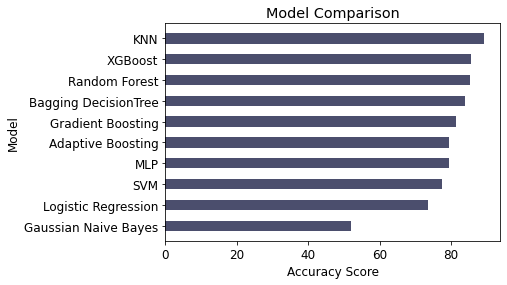

In [27]:
model = list(i[0] for i in mscore)
score = list(round(i[1]*100,2) for i in mscore)

print('Accracy Score: \n')
for m,s in zip(model, score):
    print(f'{m}: {s}%')
  
 
# creating horizontal bar plot
plt.barh(model, score, height = 0.5, color='#4B4E6D') # this color is called independence, how cool!
 
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.title("Model Comparison")
plt.gca().invert_yaxis()
plt.show()

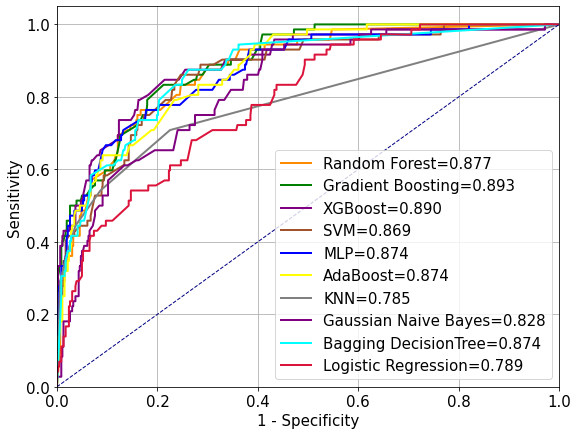

In [28]:
rf_prediction_proba = rnd_clf.predict_proba(X_test)[:, 1]
def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 7))
matplotlib.rcParams.update({'font.size': 15})
plt.grid()
fpr, tpr, roc_auc = roc_curve_and_score(y_test, rf_prediction_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='Random Forest={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, gbc_prediction_proba)
plt.plot(fpr, tpr, color='green', lw=2,
         label='Gradient Boosting={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, xgbc_prediction_proba)
plt.plot(fpr, tpr, color='purple', lw=2,
         label='XGBoost={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, svm_prediction_proba)
plt.plot(fpr, tpr, color='sienna', lw=2,
         label='SVM={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, mlp_prediction_proba)
plt.plot(fpr, tpr, color='blue', lw=2,
         label='MLP={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, ada_prediction_proba)
plt.plot(fpr, tpr, color='yellow', lw=2,
         label='AdaBoost={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, knn_prediction_proba)
plt.plot(fpr, tpr, color='grey', lw=2,
         label='KNN={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, gnb_prediction_proba)
plt.plot(fpr, tpr, color='purple', lw=2,
         label='Gaussian Naive Bayes={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, bg_prediction_proba)
plt.plot(fpr, tpr, color='cyan', lw=2,
         label='Bagging DecisionTree={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, clf_prediction_proba)
plt.plot(fpr, tpr, color='crimson', lw=2,
         label='Logistic Regression={0:.3f}'.format(roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()